<a href="https://colab.research.google.com/github/akhileshkb/prml-notes/blob/master/prml_quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd drive/My\ Drive/prml\ quiz\ 1

/content/drive/My Drive/prml quiz 1


In [3]:
df = pd.read_csv('quiz1_dataset.csv',header=None)
print(df)

         0      1     2      3
0    7.185   4.03  17.8  7.287
1    6.998   2.94  18.7  7.014
2    7.147   5.33  18.7  7.602
3    6.430   5.21  18.7  6.027
4    6.012  12.43  15.2  4.809
..     ...    ...   ...    ...
482  6.593   9.67  21.0  4.704
483  6.120   9.08  21.0  4.326
484  6.976   5.64  21.0  5.019
485  6.794   6.48  21.0  4.620
486  6.030   7.88  21.0  2.499

[487 rows x 4 columns]


In [4]:
df_shuffle = df.sample(frac=1)

In [5]:
k = 5
X = df_shuffle[[0,1,2]]
Y = df_shuffle[[3]]
x = np.array(X)
y = np.array(Y)
x1,y1 = X[:int(len(df)/5)],Y[:int(len(df)/5)]
x2,y2 = X[int(len(df)/5):int(2*len(df)/5)],Y[int(len(df)/5):int(2*len(df)/5)]
x3,y3 = X[int(2*len(df)/5):int(3*len(df)/5)],Y[int(2*len(df)/5):int(3*len(df)/5)]
x4,y4 = X[int(3*len(df)/5):int(4*len(df)/5)],Y[int(3*len(df)/5):int(4*len(df)/5)]
x5,y5 = X[int(4*len(df)/5):],Y[int(4*len(df)/5):]

In [6]:
print(df.corr())

          0         1         2         3
0  1.000000 -0.611717 -0.303604  0.697206
1 -0.611717  1.000000  0.358017 -0.761267
2 -0.303604  0.358017  1.000000 -0.519447
3  0.697206 -0.761267 -0.519447  1.000000


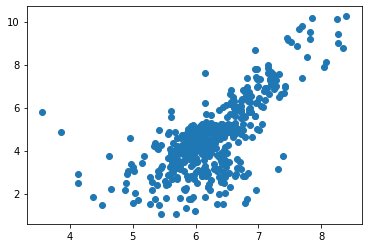

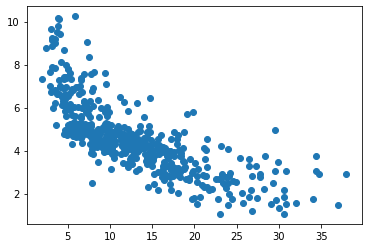

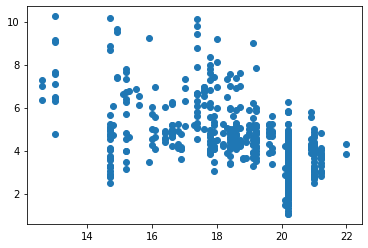

In [9]:
plt.scatter(X[[0]],Y)
plt.show()
plt.scatter(X[[1]],Y)
plt.show()
plt.scatter(X[[2]],Y)
plt.show()

In [8]:
def data_transform(X,degree): 
 # write your code here 
  x_new = []#X.reshape(1000,1)
  for x1 in X:
    j=[]
    for i in range(0,degree+1):
      j.append(x1**i)
      # print(x_new[:10])
    x_new.append(j)
  X_new = np.array(x_new)
  return X_new.T

class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
   # write your code here
    # print(w_old.shape,x.shape,y.shape)
    w = w_old + (2*lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
    
    return w

  def error(self,w,y,x):
    return (np.sum((y - (x.T@w))**2))/(y.shape[0])

  def mat_inv(self,y,x_aug):
    return (np.linalg.pinv(x_aug@x_aug.T))@(x_aug@y)
    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    
    # write your code here
    eps = 0.000001
    w_old = np.random.rand(x.shape[0],1)
    error1 = 100002.
    error2 = 100000.
    err = []
    while ((error1 - error2) > eps) :
      error1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)
      error2 = self.error(w_old,y,x)
      err.append(error1)
    w_pred = w_old
    return w_pred,err

training on x1,x2,x3,x4 and validation on x5

In [9]:
#regresssion on first variable

def train(frames,frames1,x5,y5):
    reg = regression()
    x_train = pd.concat(frames)
    y_train = pd.concat(frames1)
    x_test = x5
    y_test = y5
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    # x = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

    print("matrix inversion on first variable")
    x_train_ = np.concatenate((np.ones((x_train[:,0].shape[0],1)), x_train[:,0].reshape(len(x_train),1)),axis=1)
    x_train_ = x_train_.reshape(len(x_train),2)
    # print(x_train_)
    # print(x_train_.shape,y_train.shape)
    w_pred_0 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_0)
    w_pred = w_pred_0
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,0].shape[0],1)), x_test[:,0].reshape(len(x_test),1)),axis=1)
    # print(x_test.shape)
    x_test_ = x_test_.reshape(len(x_test),2)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    print("\n\nmatrix inversion on second variable")
    x_train_ = np.concatenate((np.ones((x_train[:,1].shape[0],1)), x_train[:,1].reshape(len(x_train),1)),axis=1)
    x_train_ = x_train_.reshape(len(x_train),2)
    w_pred_1 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_1)
    w_pred = w_pred_1
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,1].shape[0],1)), x_test[:,1].reshape(len(x_test),1)),axis=1)
    x_test_ = x_test_.reshape(len(x_test),2)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    print("\n\nmatrix inversion on third variable")
    x_train_ = np.concatenate((np.ones((x_train[:,2].shape[0],1)), x_train[:,2].reshape(len(x_train),1)),axis=1)
    x_train_ = x_train_.reshape(len(x_train),2)
    w_pred_2 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_2)
    w_pred = w_pred_2
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,2].shape[0],1)), x_test[:,2].reshape(len(x_test),1)),axis=1)
    x_test_ = x_test_.reshape(len(x_test),2)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    # print("\n\nusing all 3 parameter's optimal value")
    w = [w_pred_0,w_pred_1,w_pred_2]
    # w = np.array(w)
    # w = w.reshape(3,1)
    # # print(w.reshape(3,1).shape)
    # err = reg.error(w,y_train,x_train.T)
    # # print("train error: ",err)
    # err_test = reg.error(w,y_test,x_test.T)
    # print("test error: ",err_test)
    return w

In [10]:
frames = [x1,x2,x3,x4]
frames1 = [y1,y2,y3,y4]
w5 = train(frames,frames1,x5,y5)

matrix inversion on first variable
weights:  [[-6.65303897]
 [ 1.79512025]]
error:  1.503909770804628
test error:  1.0249722137173791

using linear regression
weights:  [[-5.19061566]
 [ 1.56361859]]
error:  1.5273199616277133
test error:  1.0414895758877125


matrix inversion on second variable
weights:  [[ 6.90461695]
 [-0.18218499]]
error:  1.2226406056330257
test error:  0.8740311873051462

using linear regression
weights:  [[ 6.83707325]
 [-0.17815214]]
error:  1.2237097599196238
test error:  0.866526871988835


matrix inversion on third variable
weights:  [[12.30512412]
 [-0.41750933]]
error:  2.097174174914159
test error:  1.6195946310542342

using linear regression
weights:  [[11.10338367]
 [-0.35353095]]
error:  2.1162016516946114
test error:  1.603646513347609


In [ ]:
frames = [x1,x2,x3,x5]
frames1 = [y1,y2,y3,y5]
w4 = train(frames,frames1,x4,y4)

matrix inversion on first variable
weights:  [[-6.96278048]
 [ 1.83988743]]
error:  1.4015497397915802
test error:  1.4396542473809906

using linear regression
weights:  [[-5.43187941]
 [ 1.59696447]]
error:  1.4260575056541338
test error:  1.4122436610593263


matrix inversion on second variable
weights:  [[ 6.84564485]
 [-0.17701006]]
error:  1.1759040284668485
test error:  1.0545440520210807

using linear regression
weights:  [[ 6.77659617]
 [-0.1729661 ]]
error:  1.1769972373332833
test error:  1.0562390818765632


matrix inversion on third variable
weights:  [[12.22774329]
 [-0.41517939]]
error:  2.043672626324274
test error:  1.824980110059069

using linear regression
weights:  [[10.95536624]
 [-0.34754628]]
error:  2.0638183822875886
test error:  1.8267447511675772


In [ ]:
frames = [x1,x2,x4,x5]
frames1 = [y1,y2,y4,y5]
w3 = train(frames,frames1,x3,y3)

matrix inversion on first variable
weights:  [[-6.22213541]
 [ 1.72071731]]
error:  1.4289490927886532
test error:  1.3367652653907223

using linear regression
weights:  [[-4.66565481]
 [ 1.47459753]]
error:  1.4538645098162593
test error:  1.4307507014373568


matrix inversion on second variable
weights:  [[ 6.82131588]
 [-0.17636731]]
error:  1.1033011694288197
test error:  1.3443103010270105

using linear regression
weights:  [[ 6.75218504]
 [-0.17222313]]
error:  1.1043956662840124
test error:  1.3499324321761386


matrix inversion on third variable
weights:  [[12.07416418]
 [-0.40575849]]
error:  1.8885363279637175
test error:  2.4428752222492567

using linear regression
weights:  [[10.85751471]
 [-0.34099378]]
error:  1.907799882892524
test error:  2.4636946308141456


In [ ]:
frames = [x1,x3,x4,x5]
frames1 = [y1,y3,y4,y5]
w2 = train(frames,frames1,x2,y2)

matrix inversion on first variable
weights:  [[-7.34931533]
 [ 1.90170319]]
error:  1.4317562297904114
test error:  1.3388587940056926

using linear regression
weights:  [[-5.82377144]
 [ 1.65909444]]
error:  1.4561797556951959
test error:  1.249376471917625


matrix inversion on second variable
weights:  [[ 6.94551111]
 [-0.18661989]]
error:  1.1762574145783382
test error:  1.0725343231554991

using linear regression
weights:  [[ 6.87470025]
 [-0.18244335]]
error:  1.1773783538999865
test error:  1.0584075705902825


matrix inversion on third variable
weights:  [[12.23658566]
 [-0.41881535]]
error:  2.111195476360238
test error:  1.5755482560058474

using linear regression
weights:  [[11.04112776]
 [-0.35506711]]
error:  2.1301237148135317
test error:  1.5691726728422326


In [ ]:
frames = [x2,x3,x4,x5]
frames1 = [y2,y3,y4,y5]
w1 = train(frames,frames1,x1,y1)

matrix inversion on first variable
weights:  [[-6.5713963 ]
 [ 1.78877331]]
error:  1.389926927894075
test error:  1.4891634650961216

using linear regression
weights:  [[-5.13009315]
 [ 1.56098802]]
error:  1.4129983403552122
test error:  1.518473920014146


matrix inversion on second variable
weights:  [[ 6.91772979]
 [-0.1816485 ]]
error:  1.1756954383029872
test error:  1.0602278584501428

using linear regression
weights:  [[ 6.85054766]
 [-0.1775769 ]]
error:  1.1767592526740136
test error:  1.050726069178075


matrix inversion on third variable
weights:  [[12.11081915]
 [-0.40556152]]
error:  2.0699836375786167
test error:  1.7333888247756286

using linear regression
weights:  [[10.87544112]
 [-0.33949307]]
error:  2.0895440687487503
test error:  1.7529426555900784


In [ ]:
# print(w1[0][0]*2)
# plt.plot(X[[0]],y_pred)

[0.49292751]


[array([[-6.5713963 ],
       [ 1.78877331]]), array([[ 6.91772979],
       [-0.1816485 ]]), array([[12.11081915],
       [-0.40556152]])]


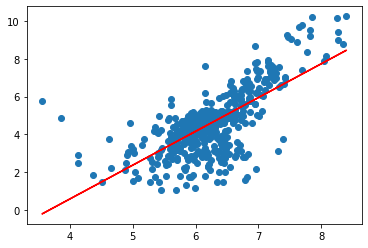

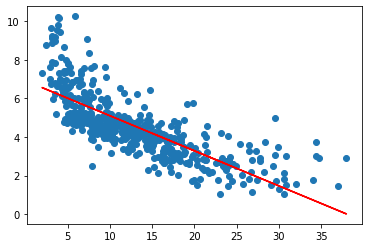

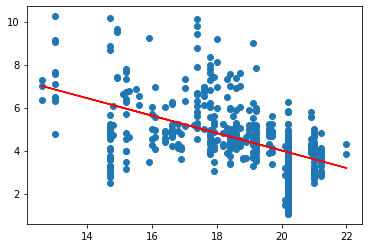

In [ ]:
plt.scatter(X[[0]],Y)
print(w1)
y_pred = w1[0][0] + w1[0][1]*X[[0]] 
plt.plot(X[[0]],y_pred,'r')
plt.show()
plt.scatter(X[[1]],Y)
y_pred = w1[1][0] + w1[1][1]*X[[1]]
plt.plot(X[[1]],y_pred,'r')
plt.show()
plt.scatter(X[[2]],Y)
y_pred = w1[2][0] + w1[2][1]*X[[2]]
plt.plot(X[[2]],y_pred,'r')
plt.show()

In [ ]:
a = np.array([[1,2],[1,3]])
print(a.shape)
print((a[:,1]**2).shape)
for i in range(2,4):
  a = np.concatenate((a,(a[:,1]**i).reshape(len(a),1)),axis=1)
print(a.shape)

(2, 2)
(2,)
(2, 4)


In [16]:
#regresssion on first variable

def train_poly(frames,frames1,x5,y5):
    reg = regression()
    x_train = pd.concat(frames)
    y_train = pd.concat(frames1)
    x_test = x5
    y_test = y5
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    # x = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

    print("matrix inversion on first variable")
    x_train_ = np.concatenate((np.ones((x_train[:,0].shape[0],1)), x_train[:,0].reshape(len(x_train),1)),axis=1)
    x_train_ = x_train_.reshape(len(x_train),2)
    for i in range(2,3):
      x_train_ = np.concatenate((x_train_,(x_train_[:,1]**i).reshape(len(x_train),1)),axis=1)
    # print(x_train_[0,:])
    # print(x_train_)
    # print(x_train_.shape,y_train.shape)
    w_pred_0 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_0)
    w_pred = w_pred_0
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,0].shape[0],1)), (x_test[:,0]).reshape(len(x_test),1)),axis=1)
    # print(x_test.shape)
    x_test_ = x_test_.reshape(len(x_test),2)
    for i in range(2,3):
      x_test_ = np.concatenate((x_test_,(x_test_[:,1]**i).reshape(len(x_test),1)),axis=1)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.000001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    print("\n\nmatrix inversion on second variable")
    x_train_ = np.concatenate((np.ones((x_train[:,1].shape[0],1)), x_train[:,1].reshape(len(x_train),1)),axis=1)
    x_train_ = x_train_.reshape(len(x_train),2)
    for i in range(2,3):
      x_train_ = np.concatenate((x_train_,(x_train_[:,1]**i).reshape(len(x_train),1)),axis=1)
    w_pred_1 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_1)
    w_pred = w_pred_1
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,1].shape[0],1)), x_test[:,1].reshape(len(x_test),1)),axis=1)
    x_test_ = x_test_.reshape(len(x_test),2)
    for i in range(2,3):
      x_test_ = np.concatenate((x_test_,(x_test_[:,1]**i).reshape(len(x_test),1)),axis=1)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.000001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    print("\n\nmatrix inversion on third variable")
    x_train_ = np.concatenate((np.ones((x_train[:,2].shape[0],1)), (x_train[:,2]).reshape(len(x_train),1)),axis=1)
    x_train_ = x_train_.reshape(len(x_train),2)
    for i in range(2,3):
      x_train_ = np.concatenate((x_train_,(x_train_[:,1]**i).reshape(len(x_train),1)),axis=1)
    w_pred_2 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_2)
    w_pred = w_pred_2
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,2].shape[0],1)), x_test[:,2].reshape(len(x_test),1)),axis=1)
    x_test_ = x_test_.reshape(len(x_test),2)
    for i in range(2,3):
      x_test_ = np.concatenate((x_test_,(x_test_[:,1]**i).reshape(len(x_test),1)),axis=1)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.000001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    # print("\n\nusing all 3 parameter's optimal value")
    w = [w_pred_0,w_pred_1,w_pred_2]
    # w = np.array(w)
    # w = w.reshape(3,1)
    # # print(w.reshape(3,1).shape)
    # err = reg.error(w,y_train,x_train.T)
    # # print("train error: ",err)
    # err_test = reg.error(w,y_test,x_test.T)
    # print("test error: ",err_test)
    return w

In [20]:
frames = [x2,x3,x4,x5]
frames1 = [y2,y3,y4,y5]
w1_poly = train_poly(frames,frames1,x1,y1)

matrix inversion on first variable
weights:  [[14.31800945]
 [-4.9968689 ]
 [ 0.54316326]]
error:  1.223314622004554
test error:  0.981063727961256

using linear regression
weights:  [[0.34145584]
 [0.45294055]
 [0.03751287]]
error:  1.718170051954433
test error:  1.636096004045518


matrix inversion on second variable
weights:  [[ 8.32721085e+00]
 [-4.09287665e-01]
 [ 7.05992355e-03]]
error:  0.8938765235026369
test error:  1.07060126841595

using linear regression
weights:  [[ 0.9694247 ]
 [ 0.54988099]
 [-0.01873757]]
error:  4.60391949695125
test error:  5.593460928945861


matrix inversion on third variable
weights:  [[-3.13972866]
 [ 1.34826658]
 [-0.04981235]]
error:  1.9228537580659437
test error:  2.058646229236234

using linear regression
weights:  [[ 0.43173639]
 [ 0.7961409 ]
 [-0.03081877]]
error:  1.9975905489601262
test error:  2.113644299880042


In [ ]:
a = np.array([[1,2],[1,3]])
print((a[:,1]**2) + (a[:,1]**1))

[ 6 12]


[array([[17.61528429],
       [-6.03035947],
       [ 0.62484538]]), array([[ 8.45378013e+00],
       [-4.34595930e-01],
       [ 7.94751688e-03]]), array([[-5.89133354],
       [ 1.66920881],
       [-0.05880189]])]


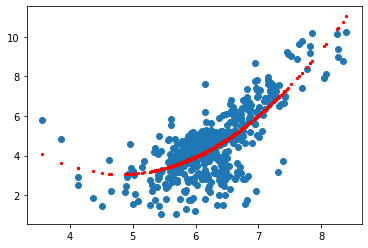

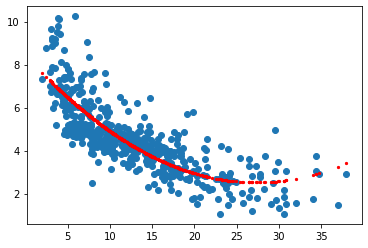

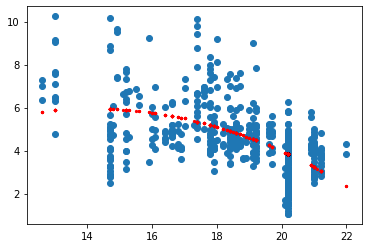

In [ ]:
plt.scatter(X[[0]],Y)
print(w1_poly)
w1 = w1_poly
y_pred = w1[0][0] + w1[0][1]*x[:,0] + w1[0][2]*(x[:,0]**2)
plt.scatter(X[[0]],y_pred,color = 'r',s=5)
plt.show()
plt.scatter(X[[1]],Y)
y_pred = w1[1][0] + w1[1][1]*X[[1]] + w1[1][2]*(X[[1]]**2)
plt.scatter(X[[1]],y_pred,color = 'r',s=5)
plt.show()
plt.scatter(X[[2]],Y)
y_pred = w1[2][0] + w1[2][1]*X[[2]] + w1[2][2]*(X[[2]]**2)
plt.scatter(X[[2]],y_pred,color = 'r',s=5)
plt.show()

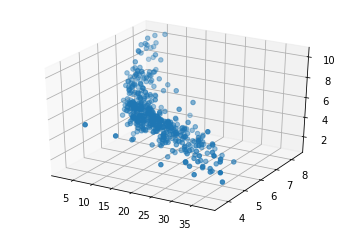

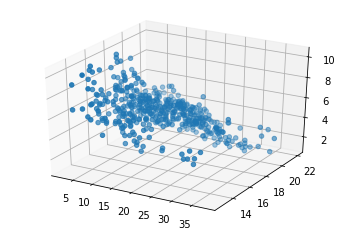

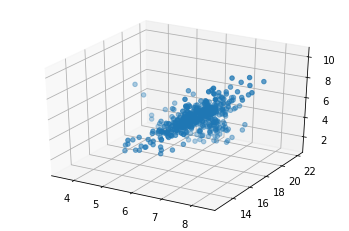

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(x[:,1],x[:,0],y[:,0])
plt.show()
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(x[:,1],x[:,2],y[:,0])
plt.show()
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(x[:,0],x[:,2],y[:,0])
plt.show()

In [24]:
#regresssion on first variable

def train_2_linear(frames,frames1,x5,y5):
    reg = regression()
    x_train = pd.concat(frames)
    y_train = pd.concat(frames1)
    x_test = x5
    y_test = y5
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    # x = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

    print("matrix inversion on first and second variable")
    x_train_ = np.concatenate((np.ones((x_train[:,0].shape[0],1)), x_train[:,:2]),axis=1)
    x_train_ = x_train_.reshape(len(x_train),3)
    # print(x_train_)
    # print(x_train_.shape,y_train.shape)
    w_pred_0 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_0)
    w_pred = w_pred_0
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,0].shape[0],1)), x_test[:,:2]),axis=1)
    # print(x_test.shape)
    x_test_ = x_test_.reshape(len(x_test),3)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    print("\n\nmatrix inversion on second and third variable")
    x_train_ = np.concatenate((np.ones((x_train[:,1].shape[0],1)), x_train[:,1:]),axis=1)
    x_train_ = x_train_.reshape(len(x_train),3)
    w_pred_1 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_1)
    w_pred = w_pred_1
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,1].shape[0],1)), x_test[:,1:]),axis=1)
    x_test_ = x_test_.reshape(len(x_test),3)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    print("\n\nmatrix inversion on first and third variable")
    x_train_ = np.concatenate((np.ones((x_train[:,2].shape[0],1)), x_train[:,[0,2]]),axis=1)
    x_train_ = x_train_.reshape(len(x_train),3)
    w_pred_2 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_2)
    w_pred = w_pred_2
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,2].shape[0],1)), x_test[:,[0,2]]),axis=1)
    x_test_ = x_test_.reshape(len(x_test),3)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    # print("\n\nusing all 3 parameter's optimal value")
    w = [w_pred_0,w_pred_1,w_pred_2]
    # w = np.array(w)
    # w = w.reshape(3,1)
    # # print(w.reshape(3,1).shape)
    # err = reg.error(w,y_train,x_train.T)
    # # print("train error: ",err)
    # err_test = reg.error(w,y_test,x_test.T)
    # print("test error: ",err_test)
    return w

In [30]:
frames = [x2,x3,x4,x5]
frames1 = [y2,y3,y4,y5]
w1_2_linear = train_2_linear(frames,frames1,x1,y1)

matrix inversion on first and second variable
weights:  [[ 0.12682191]
 [ 0.97524155]
 [-0.12987062]]
error:  0.8553582088477738
test error:  1.1762712509185052

using linear regression
weights:  [[ 0.81701502]
 [ 0.87695213]
 [-0.1355155 ]]
error:  0.8577281166056065
test error:  1.173096305605305


matrix inversion on second and third variable
weights:  [[10.66318511]
 [-0.15888233]
 [-0.21923312]]
error:  0.8983672398843008
test error:  1.2130831660462684

using linear regression
weights:  [[ 9.42627313]
 [-0.1622699 ]
 [-0.15082831]]
error:  0.9179537864203609
test error:  1.2299928598248766


matrix inversion on first and third variable
weights:  [[-0.41074185]
 [ 1.5957844 ]
 [-0.27265289]]
error:  1.0651710299520256
test error:  1.3731143530584549

using linear regression
weights:  [[ 0.92631421]
 [ 1.46398891]
 [-0.30013103]]
error:  1.0726002205631684
test error:  1.3531961883318027


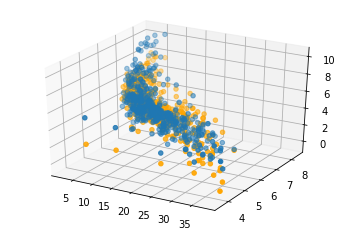

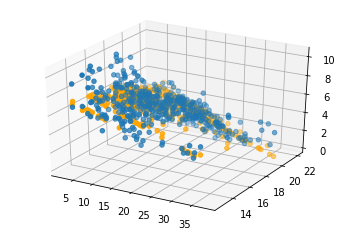

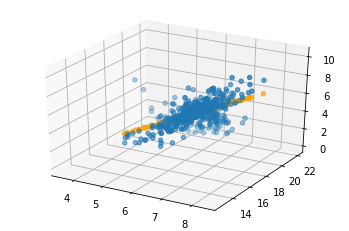

In [ ]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(x[:,1],x[:,0],y[:,0])
y_pred = w1_2_linear[0][0] + w1_2_linear[0][1]*x[:,0] + w1_2_linear[0][2]*x[:,1]
ax.scatter(x[:,1],x[:,0],y_pred,color = 'orange')
plt.show()
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(x[:,1],x[:,2],y[:,0])
y_pred = w1_2_linear[1][0] + w1_2_linear[1][1]*x[:,1] + w1_2_linear[1][2]*x[:,2]
ax.scatter(x[:,1],x[:,2],y_pred,color = 'orange')
plt.show()
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(x[:,0],x[:,2],y[:,0])
y_pred = w1_2_linear[2][0] + w1_2_linear[2][1]*x[:,0] + w1_2_linear[2][2]*x[:,2]
ax.scatter(x[:,0],x[:,2],y_pred,color = 'orange')
plt.show()

In [ ]:
a = np.array([[1,2],[2,3],[1,2]])
print((a[:,0]*a[:,1]).shape)

(3,)


In [33]:
#regresssion on first variable

def train_2_poly(frames,frames1,x5,y5):
    reg = regression()
    x_train = pd.concat(frames)
    y_train = pd.concat(frames1)
    x_test = x5
    y_test = y5
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    # x = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

    print("matrix inversion on first and second variable")
    x_train_ = np.concatenate((np.ones((x_train[:,0].shape[0],1)), x_train[:,:2]),axis=1)
    x_train_ = x_train_.reshape(len(x_train),3)
    x_train_ = np.concatenate((x_train_,(x_train_[:,1]**2).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,2]**2).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,1]*x_train_[:,2]).reshape(len(x_train),1)),axis=1)
    # print(x_train_)
    # print(x_train_.shape,y_train.shape)
    w_pred_0 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_0)
    w_pred = w_pred_0
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,0].shape[0],1)), x_test[:,:2]),axis=1)
    # print(x_test.shape)
    x_test_ = x_test_.reshape(len(x_test),3)
    x_test_ = np.concatenate((x_test_,(x_test_[:,1]**2).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,2]**2).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,1]*x_test_[:,2]).reshape(len(x_test),1)),axis=1)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.000001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    print("\n\nmatrix inversion on second and third variable")
    x_train_ = np.concatenate((np.ones((x_train[:,1].shape[0],1)), x_train[:,1:]),axis=1)
    x_train_ = x_train_.reshape(len(x_train),3)
    x_train_ = np.concatenate((x_train_,(x_train_[:,1]**2).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,2]**2).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,1]*x_train_[:,2]).reshape(len(x_train),1)),axis=1)
    w_pred_1 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_1)
    w_pred = w_pred_1
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,1].shape[0],1)), x_test[:,1:]),axis=1)
    x_test_ = x_test_.reshape(len(x_test),3)
    x_test_ = np.concatenate((x_test_,(x_test_[:,1]**2).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,2]**2).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,1]*x_test_[:,2]).reshape(len(x_test),1)),axis=1)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.000001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    print("\n\nmatrix inversion on first and third variable")
    x_train_ = np.concatenate((np.ones((x_train[:,2].shape[0],1)), x_train[:,[0,2]]),axis=1)
    x_train_ = x_train_.reshape(len(x_train),3)
    x_train_ = np.concatenate((x_train_,(x_train_[:,1]**2).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,2]**2).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,1]*x_train_[:,2]).reshape(len(x_train),1)),axis=1)
    w_pred_2 = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred_2)
    w_pred = w_pred_2
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,2].shape[0],1)), x_test[:,[0,2]]),axis=1)
    x_test_ = x_test_.reshape(len(x_test),3)
    x_test_ = np.concatenate((x_test_,(x_test_[:,1]**2).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,2]**2).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,1]*x_test_[:,2]).reshape(len(x_test),1)),axis=1)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.000001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

    # print("\n\nusing all 3 parameter's optimal value")
    w = [w_pred_0,w_pred_1,w_pred_2]
    # w = np.array(w)
    # w = w.reshape(3,1)
    # # print(w.reshape(3,1).shape)
    # err = reg.error(w,y_train,x_train.T)
    # # print("train error: ",err)
    # err_test = reg.error(w,y_test,x_test.T)
    # print("test error: ",err_test)
    return w

In [38]:
frames = [x2,x3,x4,x5]
frames1 = [y2,y3,y4,y5]
w1_2_poly = train_2_poly(frames,frames1,x1,y1)

matrix inversion on first and second variable
weights:  [[ 2.63237974e+00]
 [-8.66658889e-01]
 [ 4.23972639e-01]
 [ 2.24646360e-01]
 [-1.17812326e-03]
 [-8.65280069e-02]]
error:  0.5597215692023191
test error:  0.5611531030761121

using linear regression
weights:  [[ 0.39710475]
 [ 0.51001351]
 [ 0.22310135]
 [ 0.08443431]
 [ 0.00189057]
 [-0.07218151]]
error:  0.5931483797471266
test error:  0.6442560747757896


matrix inversion on second and third variable
weights:  [[ 1.31098193e+01]
 [-4.97435822e-01]
 [-2.90242287e-01]
 [ 5.43968757e-03]
 [-6.46972389e-05]
 [ 8.56416281e-03]]
error:  0.7503129686454882
test error:  1.0003916855204071

using linear regression
weights:  [[ 0.87985907]
 [ 0.20765197]
 [ 0.65888358]
 [ 0.00405658]
 [-0.0165168 ]
 [-0.025891  ]]
error:  1.0425613013066075
test error:  1.2277238077058814


matrix inversion on first and third variable
weights:  [[-41.23802293]
 [  2.43996618]
 [  4.03068243]
 [  0.27211182]
 [ -0.0787274 ]
 [ -0.2385829 ]]
error:  0.8243

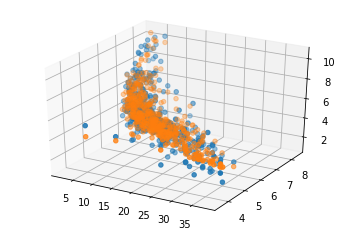

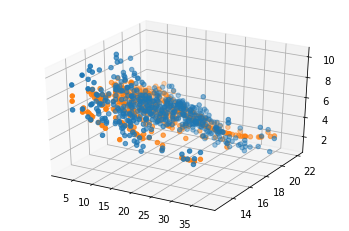

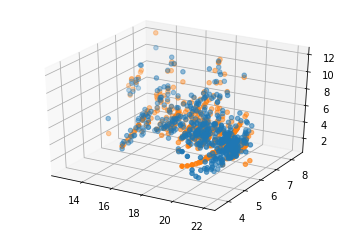

In [356]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(x[:,1],x[:,0],y[:,0])
y_pred = w1_2_poly[0][0] + w1_2_poly[0][1]*x[:,0] + w1_2_poly[0][2]*x[:,1] + w1_2_poly[0][3]*(x[:,0]**2) + w1_2_poly[0][4]*(x[:,1]**2) + w1_2_poly[0][5]*(x[:,0]*x[:,1])
ax.scatter(x[:,1],x[:,0],y_pred)
plt.show()
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(x[:,1],x[:,2],y[:,0])
y_pred = w1_2_poly[1][0] + w1_2_poly[1][1]*x[:,1] + w1_2_poly[1][2]*x[:,2] + w1_2_poly[1][3]*(x[:,1]**2) + w1_2_poly[1][4]*(x[:,2]**2) + w1_2_poly[1][5]*(x[:,1]*x[:,2])
ax.scatter(x[:,1],x[:,2],y_pred)
plt.show()
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(x[:,2],x[:,0],y[:,0])
y_pred = w1_2_poly[2][0] + w1_2_poly[2][1]*x[:,0] + w1_2_poly[2][2]*x[:,2] + w1_2_poly[2][3]*(x[:,0]**2) + w1_2_poly[2][4]*(x[:,2]**2) + w1_2_poly[2][5]*(x[:,0]*x[:,2])
ax.scatter(x[:,2],x[:,0],y_pred)
plt.show()

In [40]:
def train_all(frames,frames1,x5,y5):
    reg = regression()
    x_train = pd.concat(frames)
    y_train = pd.concat(frames1)
    x_test = x5
    y_test = y5
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    print("matrix_inversion")
    x_train_ = np.concatenate((np.ones((x_train[:,2].shape[0],1)), x_train[:,:]),axis=1)
    x_train_ = x_train_.reshape(len(x_train),4)
    w_pred = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,2].shape[0],1)), x_test[:,:]),axis=1)
    x_test_ = x_test_.reshape(len(x_test),4)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.000001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

In [45]:
frames = [x2,x3,x4,x5]
frames1 = [y2,y3,y4,y5]
w1_all = train_all(frames,frames1,x1,y1)

matrix_inversion
weights:  [[ 4.0277461 ]
 [ 0.90006202]
 [-0.11204253]
 [-0.19805412]]
error:  0.7018909157081736
test error:  1.049896665295357

using linear regression
weights:  [[ 0.90172576]
 [ 0.64573947]
 [-0.14271889]
 [ 0.07571759]]
error:  1.0384808361284201
test error:  1.291290620570344


In [46]:
def train_all_poly(frames,frames1,x5,y5):
    reg = regression()
    x_train = pd.concat(frames)
    y_train = pd.concat(frames1)
    x_test = x5
    y_test = y5
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    print("matrix_inversion")
    x_train_ = np.concatenate((np.ones((x_train[:,2].shape[0],1)), x_train[:,:]),axis=1)
    x_train_ = x_train_.reshape(len(x_train),4)
    x_train_ = np.concatenate((x_train_,(x_train_[:,0]**2).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,1]**2).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,2]**2).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,0]*x_train_[:,1]).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,1]*x_train_[:,2]).reshape(len(x_train),1)),axis=1)
    x_train_ = np.concatenate((x_train_,(x_train_[:,0]*x_train_[:,2]).reshape(len(x_train),1)),axis=1)
    w_pred = reg.mat_inv(y_train,x_train_.T)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    x_test_ = np.concatenate((np.ones((x_test[:,2].shape[0],1)), x_test[:,:]),axis=1)
    x_test_ = x_test_.reshape(len(x_test),4)
    x_test_ = np.concatenate((x_test_,(x_test_[:,0]**2).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,1]**2).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,2]**2).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,0]*x_test_[:,1]).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,1]*x_test_[:,2]).reshape(len(x_test),1)),axis=1)
    x_test_ = np.concatenate((x_test_,(x_test_[:,0]*x_test_[:,2]).reshape(len(x_test),1)),axis=1)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)
    print("\nusing linear regression")
    w_pred,err = reg.Regression_grad_des(x_train_.T,y_train,0.000001)
    print("weights: ",w_pred)
    err = reg.error(w_pred,y_train,x_train_.T)
    print("error: ", err)
    err_test = reg.error(w_pred,y_test,x_test_.T)
    print("test error: ", err_test)

In [51]:
frames = [x2,x3,x4,x5]
frames1 = [y2,y3,y4,y5]
w1_all = train_all_poly(frames,frames1,x1,y1)

matrix_inversion
weights:  [[ 3.16118416e+00]
 [-5.24864901e-01]
 [ 1.81137839e-01]
 [-1.44771285e-01]
 [ 3.16118416e+00]
 [ 2.23628305e-01]
 [-1.14029736e-03]
 [-5.24864913e-01]
 [-7.42411905e-02]
 [ 1.81137839e-01]]
error:  0.4819358628692414
test error:  0.5151032325402887

using linear regression
weights:  [[ 0.17503136]
 [-0.16468477]
 [-0.17363801]
 [-0.12837218]
 [ 0.6126116 ]
 [ 0.09421806]
 [-0.00191739]
 [ 0.78782835]
 [-0.10106839]
 [ 0.70372089]]
error:  0.5116773443526357
test error:  0.5850473900898403
